# Taller 1 - Nivel 0: Palmer Penguins

## MLOps - Pontificia Universidad Javeriana

### Etapa 1: Preparación de datos
### Etapa 2: Creación de modelo

## Paso 1: Importar librerías necesarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from palmerpenguins import load_penguins

print("Librerías importadas correctamente ")

Librerías importadas correctamente ✅


## Paso 2: Carga de datos
Cargamos el dataset de Palmer Penguins y vemos las primeras filas para entender su estructura.

In [2]:
# Cargar el dataset
df = load_penguins()

# Ver las primeras filas
print(f"Dimensiones del dataset: {df.shape}")
df.head()

Dimensiones del dataset: (344, 8)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Paso 3: Exploración inicial del dataset
Revisamos los tipos de datos, valores nulos y estadísticas descriptivas.

In [3]:
# Información general del dataset
print("=== Tipos de datos ===")
print(df.dtypes)
print("\n=== Valores nulos por columna ===")
print(df.isnull().sum())
print(f"\nTotal de valores nulos: {df.isnull().sum().sum()}")

=== Tipos de datos ===
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

=== Valores nulos por columna ===
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

Total de valores nulos: 19


## Paso 4: Limpieza de datos
Eliminamos las filas con valores nulos. Se elige esta estrategia porque:
- Solo hay 19 nulos de 344 filas (~5%), la pérdida de datos es mínima.
- No se introducen datos artificiales que podrían sesgar el modelo.
- Alternativa descartada: imputar con media/mediana (numéricas) y moda (categóricas).

In [4]:
# Revisamos cuántas filas tienen al menos un valor nulo
print(f"Filas antes de limpieza: {df.shape[0]}")

# Eliminamos las filas con valores nulos
# Se usa dropna() que remueve cualquier fila que tenga al menos un NaN
df = df.dropna()

# Verificamos el resultado
print(f"Filas después de limpieza: {df.shape[0]}")
print(f"Filas eliminadas: {344 - df.shape[0]}")

# Confirmamos que ya no hay valores nulos
print(f"\nValores nulos restantes: {df.isnull().sum().sum()}")

Filas antes de limpieza: 344
Filas después de limpieza: 333
Filas eliminadas: 11

Valores nulos restantes: 0


## Paso 5: Estadísticas descriptivas
Analizamos las variables numéricas y categóricas para entender la distribución de los datos.

In [5]:
# Estadísticas descriptivas de variables numéricas
# describe() muestra: conteo, media, desviación estándar, min, max y cuartiles
print("=== Variables Numéricas ===")
df.describe()

=== Variables Numéricas ===


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [6]:
# Distribución de variables categóricas
# value_counts() muestra cuántas veces aparece cada valor
print("=== Distribución por Especie ===")
print(df['species'].value_counts())
print("\n=== Distribución por Isla ===")
print(df['island'].value_counts())
print("\n=== Distribución por Sexo ===")
print(df['sex'].value_counts())

=== Distribución por Especie ===
species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

=== Distribución por Isla ===
island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

=== Distribución por Sexo ===
sex
male      168
female    165
Name: count, dtype: int64


### Hallazgos del analisis descriptivo
- El dataset quedo con 333 filas limpias tras eliminar 11 filas con nulos.
- Se tienen 3 especies: Adelie (146), Gentoo (119) y Chinstrap (68). Las clases estan desbalanceadas pero no de forma critica.
- Las variables numericas (bill_length, bill_depth, flipper_length, body_mass) presentan buena variabilidad, lo que facilita la diferenciacion entre especies.
- La distribucion por sexo esta equilibrada (168 machos, 165 hembras).
- La columna `year` (2007-2009) solo indica el anio de recoleccion y no aporta valor predictivo, se descartara mas adelante.

## Paso 6: Visualizacion exploratoria
Graficos para entender como se distribuyen los datos y como se separan las especies visualmente.

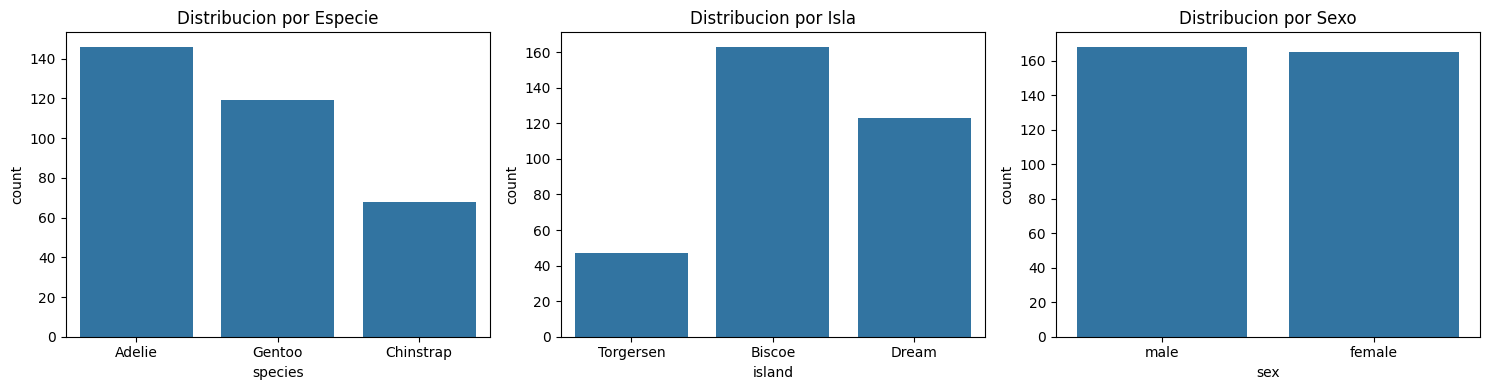

In [7]:
# Distribucion de especies (barras)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Conteo por especie
sns.countplot(data=df, x='species', ax=axes[0])
axes[0].set_title('Distribucion por Especie')

# Conteo por isla
sns.countplot(data=df, x='island', ax=axes[1])
axes[1].set_title('Distribucion por Isla')

# Conteo por sexo
sns.countplot(data=df, x='sex', ax=axes[2])
axes[2].set_title('Distribucion por Sexo')

plt.tight_layout()
plt.show()

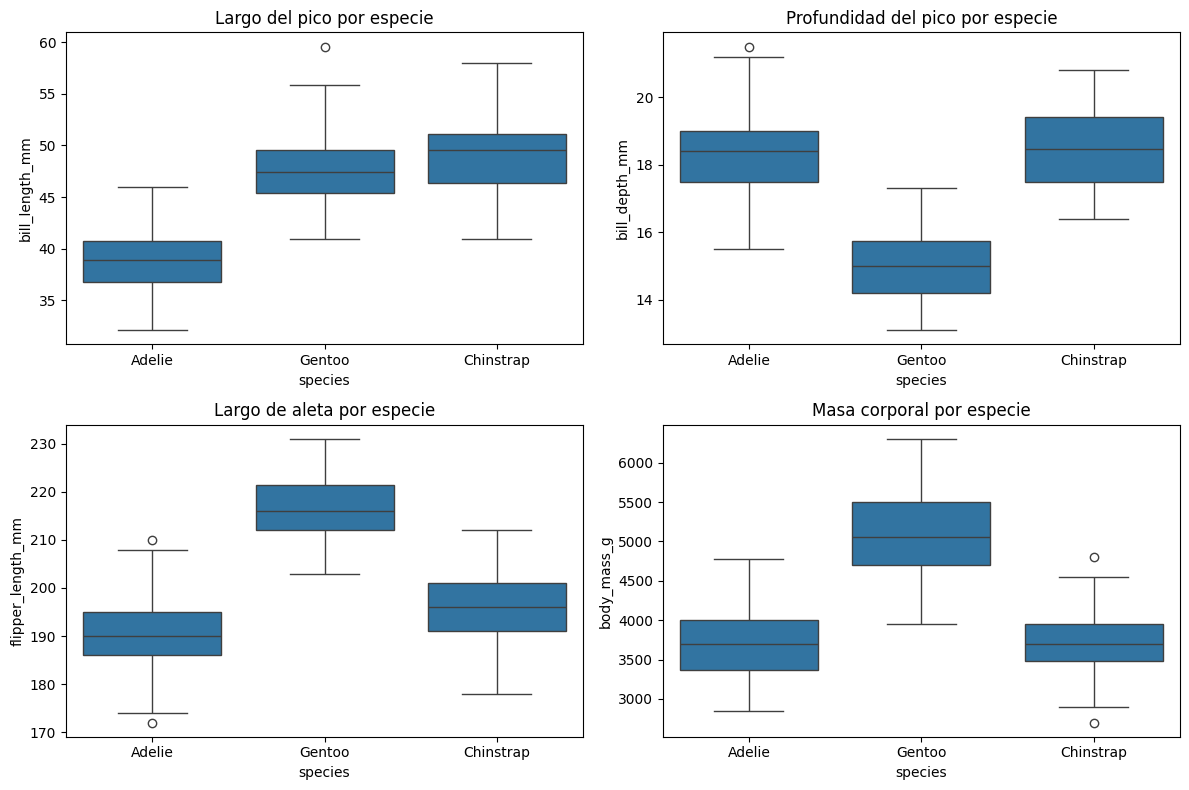

In [8]:
# Boxplots de variables numericas por especie
# Permiten ver como se distribuyen las medidas en cada especie
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(data=df, x='species', y='bill_length_mm', ax=axes[0, 0])
axes[0, 0].set_title('Largo del pico por especie')

sns.boxplot(data=df, x='species', y='bill_depth_mm', ax=axes[0, 1])
axes[0, 1].set_title('Profundidad del pico por especie')

sns.boxplot(data=df, x='species', y='flipper_length_mm', ax=axes[1, 0])
axes[1, 0].set_title('Largo de aleta por especie')

sns.boxplot(data=df, x='species', y='body_mass_g', ax=axes[1, 1])
axes[1, 1].set_title('Masa corporal por especie')

plt.tight_layout()
plt.show()

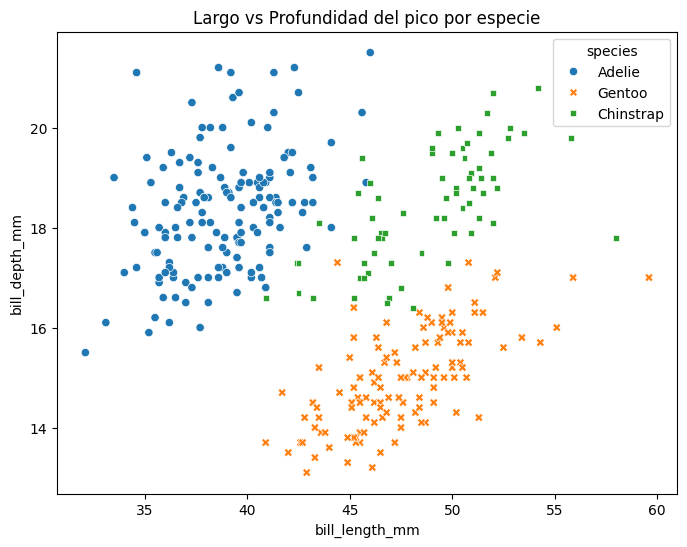

In [9]:
# Scatter plot: largo del pico vs profundidad del pico, coloreado por especie
# Permite ver como se separan las especies en estas dos dimensiones
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', style='species')
plt.title('Largo vs Profundidad del pico por especie')
plt.show()

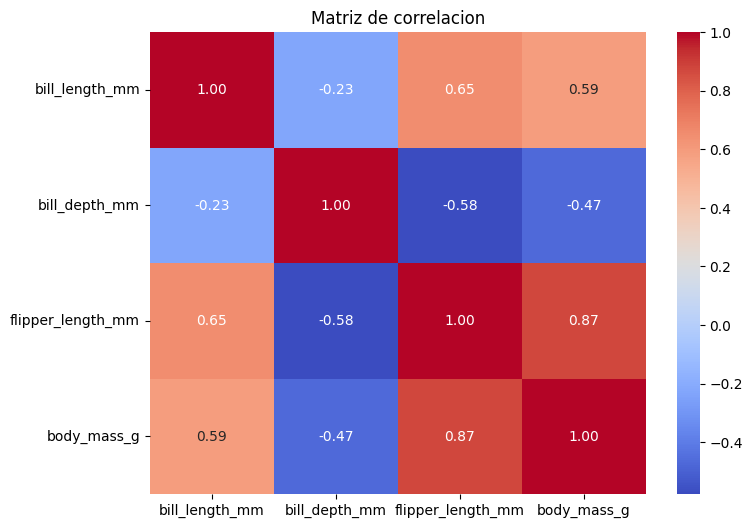

In [10]:
# Heatmap de correlacion entre variables numericas
# Muestra que tan relacionadas estan las variables entre si
plt.figure(figsize=(8, 6))
numeric_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlacion')
plt.show()

### Hallazgos de la visualizacion exploratoria

**Boxplots por especie:**
- **bill_length_mm**: Adelie tiene picos mas cortos (~38-40mm). Gentoo y Chinstrap tienen picos mas largos (~47-50mm), con bastante solapamiento entre ellas.
- **bill_depth_mm**: Gentoo se separa claramente con picos menos profundos (~15mm). Adelie y Chinstrap son similares (~18-19mm).
- **flipper_length_mm**: Gentoo tiene aletas mucho mas largas (~215mm) comparado con Adelie (~190mm) y Chinstrap (~195mm). Esta variable es un buen diferenciador para Gentoo.
- **body_mass_g**: Gentoo es la especie mas pesada (~5000g). Adelie y Chinstrap son mas livianas y similares entre si (~3500-3800g).

**Scatter plot (largo vs profundidad del pico):**
- Las 3 especies forman grupos visualmente distinguibles. Adelie esta arriba a la izquierda (pico corto y profundo), Gentoo abajo en el centro (pico largo y poco profundo), Chinstrap arriba a la derecha (pico largo y profundo).
- Hay algo de solapamiento pero la separacion es buena, lo que indica que un modelo de clasificacion deberia funcionar bien.

**Matriz de correlacion:**
- flipper_length y body_mass tienen correlacion alta (0.87): pinguinos con aletas mas largas son mas pesados.
- bill_depth tiene correlacion negativa con flipper_length (-0.58) y body_mass (-0.47).
- No hay variables redundantes que sea necesario eliminar.

**Conclusion:** Las variables numericas muestran buena capacidad de separacion entre especies. El modelo deberia lograr buena precision.

---
# Etapa 2: Creacion de modelo

## Paso 7: Transformacion de datos
- Se elimina la columna `year` porque no aporta valor predictivo.
- Se codifican las variables categoricas (`island`, `sex`) a valores numericos usando LabelEncoder para que el modelo pueda procesarlas.
- Se separan las features (X) de la variable objetivo (y = species).

In [11]:
from sklearn.preprocessing import LabelEncoder

# Eliminamos la columna year porque no aporta valor predictivo
df = df.drop(columns=['year'])

# Codificamos las variables categoricas a valores numericos
# LabelEncoder convierte cada categoria en un numero entero
le_island = LabelEncoder()
le_sex = LabelEncoder()

df['island'] = le_island.fit_transform(df['island'])
df['sex'] = le_sex.fit_transform(df['sex'])

# Verificamos como quedo el dataframe transformado
print("Clases de island:", list(le_island.classes_))
print("Clases de sex:", list(le_sex.classes_))
print(f"\nDimensiones: {df.shape}")
df.head()

Clases de island: ['Biscoe', 'Dream', 'Torgersen']
Clases de sex: ['female', 'male']

Dimensiones: (333, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,1
1,Adelie,2,39.5,17.4,186.0,3800.0,0
2,Adelie,2,40.3,18.0,195.0,3250.0,0
4,Adelie,2,36.7,19.3,193.0,3450.0,0
5,Adelie,2,39.3,20.6,190.0,3650.0,1


## Paso 8: Division de datos (train/test)
Separamos los datos en conjunto de entrenamiento (80%) y prueba (20%).
- X: features (todas las columnas excepto species)
- y: variable objetivo (species)
- Se usa random_state=42 para reproducibilidad.

In [12]:
from sklearn.model_selection import train_test_split

# Separamos features (X) y variable objetivo (y)
X = df.drop(columns=['species'])
y = df['species']

# Dividimos en 80% entrenamiento y 20% prueba
# stratify=y mantiene la proporcion de especies en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Datos de entrenamiento: {X_train.shape[0]} filas")
print(f"Datos de prueba: {X_test.shape[0]} filas")
print(f"\nDistribucion en train:\n{y_train.value_counts()}")
print(f"\nDistribucion en test:\n{y_test.value_counts()}")

Datos de entrenamiento: 266 filas
Datos de prueba: 67 filas

Distribucion en train:
species
Adelie       117
Gentoo        95
Chinstrap     54
Name: count, dtype: int64

Distribucion en test:
species
Adelie       29
Gentoo       24
Chinstrap    14
Name: count, dtype: int64


## Paso 9: Entrenamiento del modelo
Se entrena un modelo RandomForestClassifier.
- Random Forest es un conjunto de arboles de decision que vota por la clase mas frecuente.
- Funciona bien con datasets pequenos, variables mixtas y no requiere escalado de datos.
- Se usa random_state=42 para reproducibilidad.

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Creamos el modelo Random Forest
# n_estimators=100: usa 100 arboles de decision
# random_state=42: para que los resultados sean reproducibles
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenamos el modelo con los datos de entrenamiento
model_rf.fit(X_train, y_train)

print("Modelo RandomForest entrenado correctamente")

Modelo RandomForest entrenado correctamente


## Paso 10: Validacion del modelo
Evaluamos el rendimiento del modelo con los datos de prueba usando:
- **Accuracy**: porcentaje de predicciones correctas.
- **Classification report**: precision, recall y f1-score por cada especie.
- **Matriz de confusion**: muestra aciertos y errores por clase.

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Realizamos predicciones con los datos de prueba
y_pred = model_rf.predict(X_test)

# Accuracy general
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Reporte detallado por especie
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

Accuracy: 1.0000

=== Classification Report ===
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



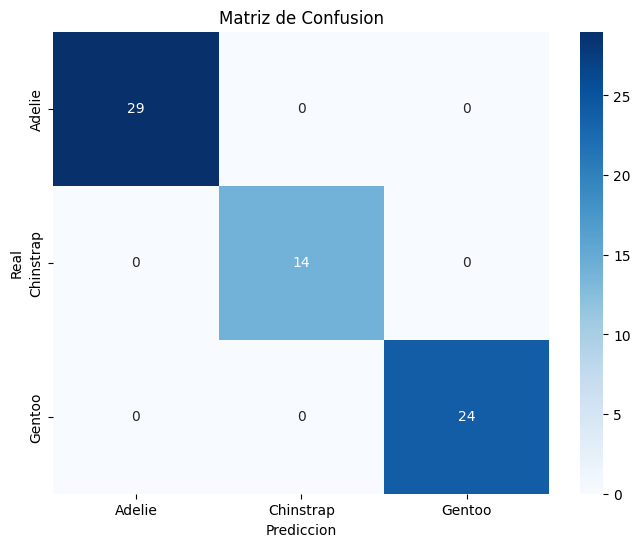

In [15]:
# Matriz de confusion visual
# Las filas son las clases reales, las columnas son las predicciones
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred, labels=model_rf.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model_rf.classes_,
            yticklabels=model_rf.classes_)
plt.xlabel('Prediccion')
plt.ylabel('Real')
plt.title('Matriz de Confusion')
plt.show()

### Hallazgos de la validacion del modelo

**Resultado: Accuracy = 100% (67/67 predicciones correctas)**

| Especie | Precision | Recall | F1-Score | Muestras |
|---------|-----------|--------|----------|----------|
| Adelie | 1.00 | 1.00 | 1.00 | 29 |
| Chinstrap | 1.00 | 1.00 | 1.00 | 14 |
| Gentoo | 1.00 | 1.00 | 1.00 | 24 |

**Matriz de confusion:**
- La diagonal principal contiene todos los valores (29, 14, 24) y no hay errores fuera de ella.
- El modelo no confundio ninguna especie con otra.

**Interpretacion:**
- Random Forest logra clasificacion perfecta en este dataset, lo cual es consistente con la exploracion visual donde las 3 especies mostraban buena separacion en las variables numericas (especialmente flipper_length y body_mass para Gentoo, y bill_depth para separar Adelie de Chinstrap).
- Con solo 333 muestras y variables bien diferenciadas, este es un problema de clasificacion relativamente sencillo para un modelo de ensamble como Random Forest.
- Para produccion, seria recomendable validar con cross-validation (k-fold) para tener una estimacion mas robusta del rendimiento.

## Paso 11: Guardar el modelo
Guardamos el modelo entrenado y los encoders usando `joblib` para poder reutilizarlos en la API (Etapa 3).
- **modelo**: RandomForestClassifier entrenado
- **encoders**: LabelEncoder de island y sex, necesarios para transformar datos nuevos antes de predecir


In [16]:
import joblib
import os

# Crear la carpeta models si no existe
os.makedirs('models', exist_ok=True)

# Guardar el modelo entrenado
joblib.dump(model_rf, 'models/random_forest_model.pkl')

# Guardar los encoders (necesarios para transformar datos nuevos en la API)
joblib.dump(le_island, 'models/label_encoder_island.pkl')
joblib.dump(le_sex, 'models/label_encoder_sex.pkl')

# Verificamos que los archivos se guardaron correctamente
for f in os.listdir('models'):
    size = os.path.getsize(f'models/{f}')
    print(f"✅ {f} ({size:,} bytes)")


✅ label_encoder_island.pkl (502 bytes)
✅ label_encoder_sex.pkl (489 bytes)
✅ random_forest_model.pkl (272,193 bytes)
